# 230968094 WEEK 2 EXERCISE 1 & 2

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# EXERCISE 1

## questions

1.	Write a user defined function ‘myFnLinReg(x,y)’ to perform Simple Linear Regression given one predictor attribute and one response attribute. The function should return the coefficients of the straight line.
2.	Use mtcars data set and consider the attributes mpg and weight. Split data into train and test sets (80 %,20%). Put training data set to ‘myFnLinReg(x,y)’ to build a linear regression model to predict mpg given the weight of the car.
3.	What is the mpg of a car, whose weight is 5.5?
4.	Compute and print accuracy measures such as RMSE and R2  for the test set. 
5.	Apply the stochastic gradient descent and mini batch gradient descent algorithms to enhance the accuracy and visualize the cost function.


In [23]:
def myFnLinReg(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x ** 2)
    
    beta_1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    beta_0 = (sum_y - beta_1 * sum_x) / n
    
    return beta_0, beta_1

mtcars=pd.read_csv('mtcars.csv')
mtcars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


Intercept (beta_0): 37.49858870967743
Slope (beta_1): -2.8134072580645175


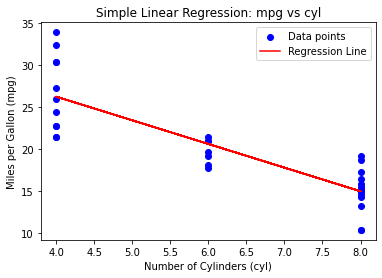

In [24]:
X = mtcars['cyl']  
y = mtcars['mpg']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
beta_0, beta_1 = myFnLinReg(X_train, y_train)

print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")
plt.scatter(X, y, color='blue', label='Data points')  # Plot the data points
plt.plot(X, beta_0 + beta_1 * X, color='red', label='Regression Line')  # Plot the regression line
plt.xlabel('Number of Cylinders (cyl)')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Simple Linear Regression: mpg vs cyl')
plt.legend()
plt.show()

Intercept (beta_0): 36.9373103135183
Slope (beta_1): -5.336941400557047
enter weight of car : 30
The predicted mpg for a car with weight 30.0 is: -123.17093170319308


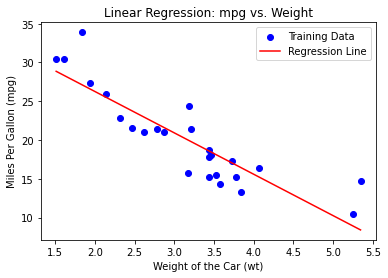

In [21]:
def myFnLinReg(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x ** 2)
    
    beta_1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    beta_0 = (sum_y - beta_1 * sum_x) / n
    
    return beta_0, beta_1

X = mtcars['wt']  
y = mtcars['mpg'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

beta_0, beta_1 = myFnLinReg(X_train, y_train)

print(f"Intercept (beta_0): {beta_0}")
print(f"Slope (beta_1): {beta_1}")


weight = float(input("enter weight of car : "))
predicted_mpg = beta_0 + beta_1 * weight
print(f"The predicted mpg for a car with weight {weight} is: {predicted_mpg}")

plt.scatter(X_train, y_train, color='blue', label='Training Data')

x_values = np.linspace(min(X_train), max(X_train), 100) 
y_values = beta_0 + beta_1 * x_values 
plt.plot(x_values, y_values, color='red', label='Regression Line')


plt.xlabel('Weight of the Car (wt)')
plt.ylabel('Miles Per Gallon (mpg)')
plt.title('Linear Regression: mpg vs. Weight')

plt.legend()

plt.show()

In [17]:
weight = 5.5
predicted_mpg = beta_0 + beta_1 * weight
print(f"The predicted mpg for a car with weight {weight} is: {predicted_mpg}")


The predicted mpg for a car with weight 5.5 is: 7.584132610454546


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

y_pred = beta_0 + beta_1 * X_test

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")

r2 = r2_score(y_test, y_pred)
print(f"R²: {r2}")


RMSE: 3.5321361326991387
R²: 0.6879761857596274


In [19]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=1000):
    m = len(X)
    beta_0, beta_1 = 0, 0 
    cost_history = []
    
    for epoch in range(epochs):
        for i in range(m):
            xi = X[i]
            yi = y[i]
            
            y_pred = beta_0 + beta_1 * xi
            
            gradient_beta_0 = -2 * (yi - y_pred)
            gradient_beta_1 = -2 * xi * (yi - y_pred)
            
            beta_0 -= learning_rate * gradient_beta_0
            beta_1 -= learning_rate * gradient_beta_1
        
        cost = np.mean((y - (beta_0 + beta_1 * X)) ** 2)
        cost_history.append(cost)
    
    return beta_0, beta_1, cost_history

beta_0_sgd, beta_1_sgd, cost_history_sgd = stochastic_gradient_descent(X_train, y_train)

print(f"SGD - Intercept: {beta_0_sgd}, Slope: {beta_1_sgd}")


SGD - Intercept: 37.66454692312466, Slope: -5.725283356861857


# EXERCISE 2

## questions

1.	Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’. 
2.	Using sklearn.linear_model, find the multiple regression model for the boston.csv dataset using the best 3 features.  (from sklearn.linear_model import LinearRegression) 
3.	Find the accuracy of the model using appropriate metrics using 80, 20 split for training and test.



In [26]:
boston=pd.read_csv('Boston.csv')
boston

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [27]:

correlation_matrix = boston.corr()

correlation_with_target = correlation_matrix['medv'].sort_values(ascending=False)

print(correlation_with_target.head(6)) 

medv     1.000000
rm       0.695360
zn       0.360445
black    0.333461
dis      0.249929
chas     0.175260
Name: medv, dtype: float64


In [28]:

X = boston[['rm', 'crim', 'tax']]  
y = boston['medv']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Model Intercept (beta_0): {model.intercept_}")
print(f"Model Coefficients (beta_1, beta_2, beta_3): {model.coef_}")


Model Intercept (beta_0): -24.00936167880063
Model Coefficients (beta_1, beta_2, beta_3): [ 8.2300581  -0.14339463 -0.01152563]


R²: 0.665940870334305
RMSE: 4.949527227688548


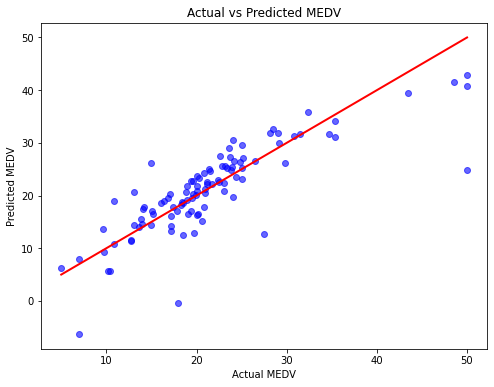

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


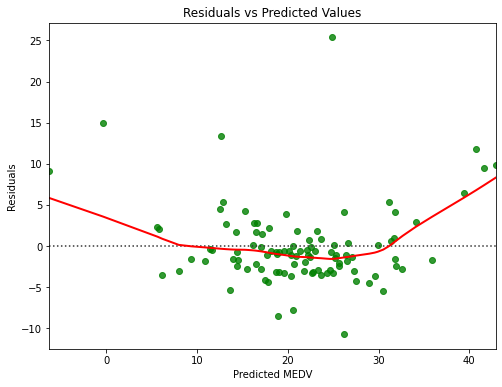

In [30]:
X = boston.drop(columns=['medv'])  
y = boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2}")
print(f"RMSE: {rmse}")
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2) 
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted MEDV')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(y_pred, residuals, lowess=True, color='green', line_kws={'color': 'red', 'lw': 2})
plt.xlabel('Predicted MEDV')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()